Carica il dataset Wine
Utilizza il modulo datasets di scikit-learn per caricare il dataset Wine.

Esplora il dataset
Visualizza il numero di campioni per ciascuna classe e calcola le statistiche di base delle feature.
Visualizzazione: crea un grafico a barre per mostrare la distribuzione delle classi.

Riduci la dimensionalità ***
Applica la PCA (Principal Component Analysis) per ridurre le dimensioni delle feature a 2 componenti
principali.
Visualizzazione: crea un grafico scatter 2D per rappresentare i dati trasformati, con i punti colorati in
base alla classe.

Sudddividi i dati in training e test set
Dividi i dati in due set: l'80% per il training e il 20% per il test.

Applica un algoritmo di classificazione
Utilizza un modello RandomForestClassifier per la classificazione.

Valuta la performance del modello
Valuta le prestazioni utilizzando le metriche di accuratezza, precisione, recall e F1-score.

Visualizza l'importanza delle feature / caratteristiche
Visualizza le feature più importanti del dataset Wine secondo il modello Random Forest, utilizzando un
grafico a barre.

Visualizza la matrice di confusione
Genera e visualizza la matrice di confusione per valutare la qualità della classificazione.
Visualizzazione: utilizza una heatmap per rappresentare la matrice di confusione in modo più chiaro.

Ottimizza l'algoritmo
Utilizza la GridSearchCV per ottimizzare i parametri del Random Forest (ad esempio: numero di estimatori e
profondità massima dell'albero).

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



In [64]:

wine = load_wine()
X = wine.data
y = wine.target

In [65]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y, columns=['target']) 

df = pd.concat([X_df, y_df], axis=1)


In [66]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
target    0
dtype: int64

In [67]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [68]:
grouped = df.groupby("target").size()

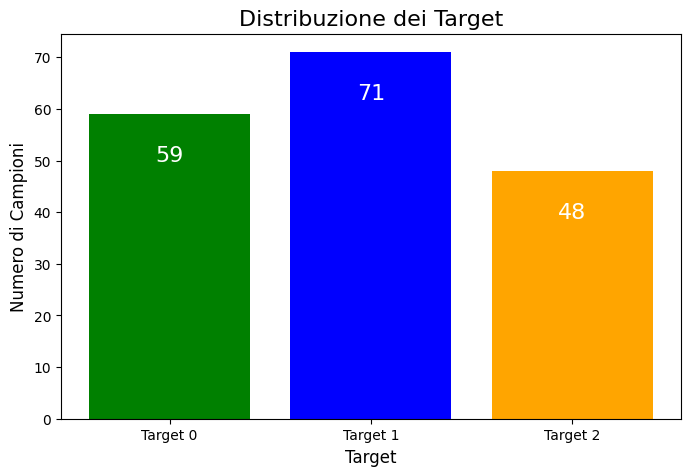

In [69]:
plt.figure(figsize=(8, 5))  # Dimensione del grafico
bars = plt.bar(grouped.index, grouped.values, color=['green','blue','orange'])
plt.title('Distribuzione dei Target', fontsize=16)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Numero di Campioni', fontsize=12)
plt.xticks(ticks=grouped.index, labels=[f'Target {i}' for i in grouped.index])
for bar in bars:
    yval = bar.get_height()  # Altezza della barra
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 10,  # Posizione del testo
             f'{int(yval)}', ha='center', va='bottom', fontsize=16, color='white')
plt.show()

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
model = RandomForestClassifier(random_state=42)

In [72]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



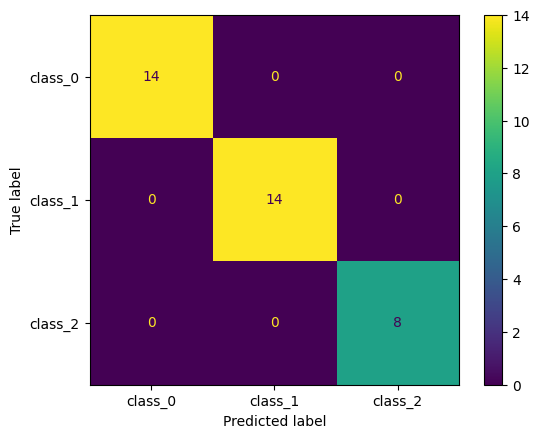

In [73]:
class_report = classification_report(y_test, y_pred, target_names = wine.target_names)
print(class_report)

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=wine.target_names)
cm_display.plot()
plt.show()

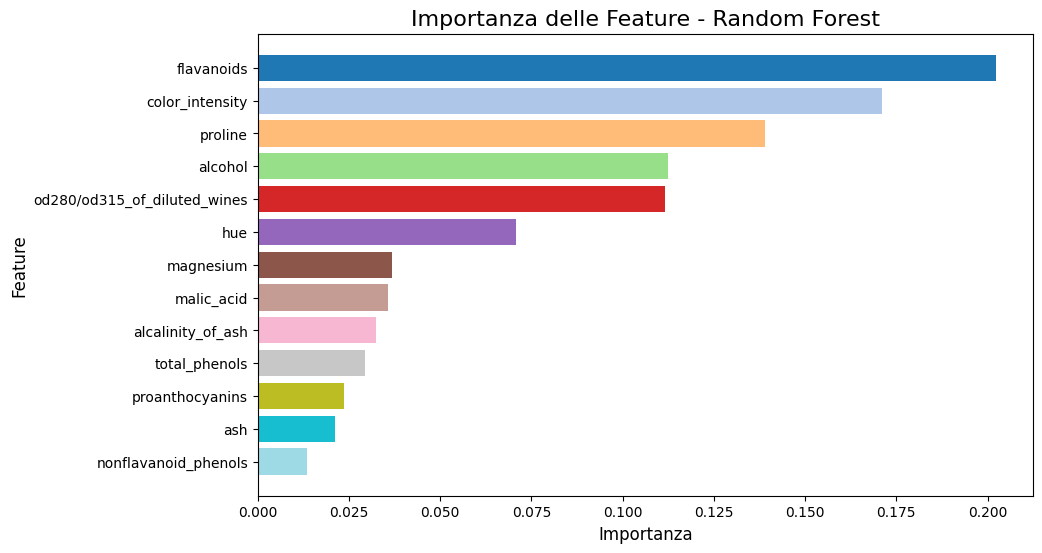

In [ ]:
feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': wine.feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

colors = plt.cm.tab20(np.linspace(0, 1, len(importance_df)))

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.title('Importanza delle Feature - Random Forest', fontsize=16)
plt.xlabel('Importanza', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.gca().invert_yaxis()
plt.show()

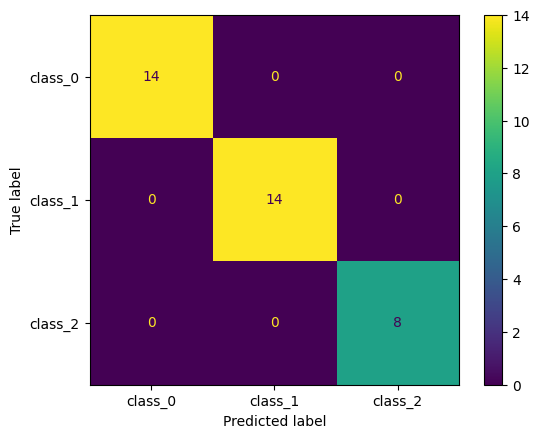

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=wine.target_names)
cm_display.plot()
plt.show()

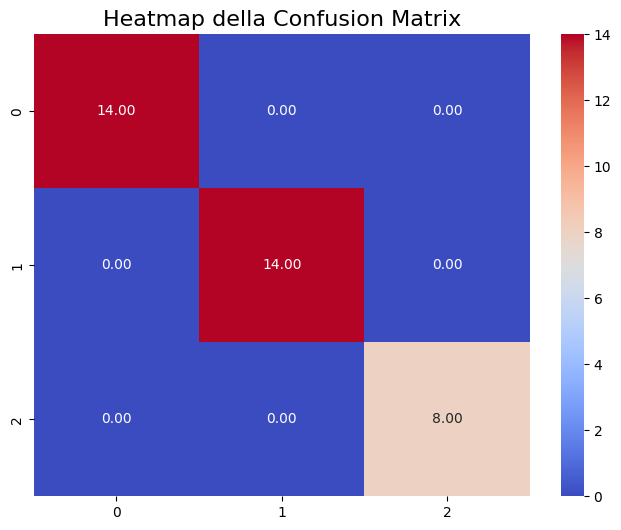

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap della Confusion Matrix', fontsize=16)
plt.show()

In [ ]:
parameters = {'n_estimators':[50,100,150], 'max_depth':[5,8,10,12]}

clf = GridSearchCV(model, parameters)

